In [1]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 615 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# READ DATASET

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vaksin/vaksinn.csv
/kaggle/input/vaksin/kbba.csv


In [3]:
import pandas as pd

df = pd.read_csv("/kaggle/input/vaksin/vaksinn.csv")
df

,id,date,username,tweet,Kategori
0,1.339103e+18,2020-12-16,abdulaz93506871,@MaspiyuO Tampang si Jokowi dan Si Koruptor E-...,2
1,1.339053e+18,2020-12-16,alyssa_ncls,Ribet gini si corona teh. Di Bisnis teruss. Eh...,2
2,1.339146e+18,2020-12-16,amellia76564885,@fadlizon Akal sehat pun harus dipakai. Sumber...,2
3,1.339143e+18,2020-12-16,amellia76564885,@fadlizon Sumber dan Asal birus corona covid 1...,2
4,1.339065e+18,2020-12-16,anaktopik,Negara yang lalai menjaga rakyat dari terpapar...,2
...,...,...,...,...,...
1995,1.341977e+18,2020-12-24,nar_dwi,"Tak usah ragu dan takut dengan Vaksin, BPOM p...",1
1996,1.341973e+18,2020-12-24,detikinet,"Untuk mengendalikan pandemi, vaksin Corona per...",1
1997,1.341972e+18,2020-12-24,heldadh3,@jokowi Sehingga vaksin ini mampu menjadi hara...,1
1998,1.341943e+18,2020-12-24,godham5,@27_jelo @jokowi #DemiNKRI Akooh jg siap utk ...,1


In [4]:
df['Kategori'].value_counts()

1    1430
2     570
Name: Kategori, dtype: int64

<AxesSubplot:xlabel='Kategori', ylabel='count'>

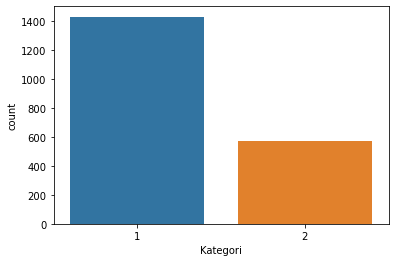

In [5]:
import seaborn as sns

sns.countplot(x="Kategori", data=df)

# PREPROCESSING

# 2. Filtering

In [6]:
df1 = df.copy()
del df1['id'], df1['date'], df1['username']
df1

,tweet,Kategori
0,@MaspiyuO Tampang si Jokowi dan Si Koruptor E-...,2
1,Ribet gini si corona teh. Di Bisnis teruss. Eh...,2
2,@fadlizon Akal sehat pun harus dipakai. Sumber...,2
3,@fadlizon Sumber dan Asal birus corona covid 1...,2
4,Negara yang lalai menjaga rakyat dari terpapar...,2
...,...,...
1995,"Tak usah ragu dan takut dengan Vaksin, BPOM p...",1
1996,"Untuk mengendalikan pandemi, vaksin Corona per...",1
1997,@jokowi Sehingga vaksin ini mampu menjadi hara...,1
1998,@27_jelo @jokowi #DemiNKRI Akooh jg siap utk ...,1


In [7]:
df1 = df1.drop_duplicates()
df1

,tweet,Kategori
0,@MaspiyuO Tampang si Jokowi dan Si Koruptor E-...,2
1,Ribet gini si corona teh. Di Bisnis teruss. Eh...,2
2,@fadlizon Akal sehat pun harus dipakai. Sumber...,2
3,@fadlizon Sumber dan Asal birus corona covid 1...,2
4,Negara yang lalai menjaga rakyat dari terpapar...,2
...,...,...
1995,"Tak usah ragu dan takut dengan Vaksin, BPOM p...",1
1996,"Untuk mengendalikan pandemi, vaksin Corona per...",1
1997,@jokowi Sehingga vaksin ini mampu menjadi hara...,1
1998,@27_jelo @jokowi #DemiNKRI Akooh jg siap utk ...,1


In [8]:
df1['Kategori'].value_counts()

1    1036
2     452
Name: Kategori, dtype: int64

<AxesSubplot:xlabel='Kategori', ylabel='count'>

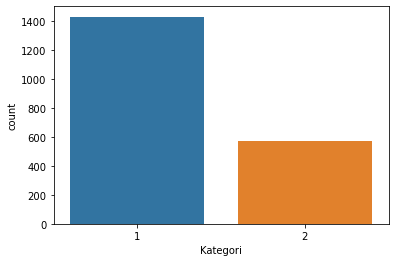

In [9]:
import seaborn as sns

sns.countplot(x="Kategori", data=df)

# 2. CASE FOLDING

In [10]:
df1['cleaned_tweets'] = df1['tweet'].apply(lambda x: x.lower())
df1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet,Kategori,cleaned_tweets
0,@MaspiyuO Tampang si Jokowi dan Si Koruptor E-...,2,@maspiyuo tampang si jokowi dan si koruptor e-...
1,Ribet gini si corona teh. Di Bisnis teruss. Eh...,2,ribet gini si corona teh. di bisnis teruss. eh...
2,@fadlizon Akal sehat pun harus dipakai. Sumber...,2,@fadlizon akal sehat pun harus dipakai. sumber...
3,@fadlizon Sumber dan Asal birus corona covid 1...,2,@fadlizon sumber dan asal birus corona covid 1...
4,Negara yang lalai menjaga rakyat dari terpapar...,2,negara yang lalai menjaga rakyat dari terpapar...
...,...,...,...
1995,"Tak usah ragu dan takut dengan Vaksin, BPOM p...",1,"tak usah ragu dan takut dengan vaksin, bpom p..."
1996,"Untuk mengendalikan pandemi, vaksin Corona per...",1,"untuk mengendalikan pandemi, vaksin corona per..."
1997,@jokowi Sehingga vaksin ini mampu menjadi hara...,1,@jokowi sehingga vaksin ini mampu menjadi hara...
1998,@27_jelo @jokowi #DemiNKRI Akooh jg siap utk ...,1,@27_jelo @jokowi #deminkri akooh jg siap utk ...


# 3. NORMALISASI

In [11]:
import re

def normalisasi(text):
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"@\w+", " ", text)
  text = re.sub(r"#\w+", " ", text)
  text = re.sub(r'\W', " ", text)
  text = re.sub(r"\d+", "", text)
  text = re.sub(r'_', ' ',text)
  text = re.sub(r' +', ' ', text)
  text = re.sub(r"^\s+", '', text)
  return text

In [12]:
df1['cleaned_tweets'] = df1['cleaned_tweets'].apply(lambda x: normalisasi(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# 4. BAKU

In [13]:
dict = {row[0] : row[1] for _, row in pd.read_csv("/kaggle/input/vaksin/kbba.csv").iterrows()}

In [14]:
def kbbi(text): 
    token = text.split()
    final_string = ' '.join(str(dict.get(word, word)) for word in token)
    return final_string

In [15]:
df1['cleaned_tweets'] = df1['cleaned_tweets'].apply(lambda x: kbbi(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
text_counts = cv.fit_transform(df1['cleaned_tweets'])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df1['Kategori'], test_size=0.2)
print(X_train.shape, X_test.shape)

(1190, 3234) (298, 3234)


In [18]:
Y_test.value_counts()

1    193
2    105
Name: Kategori, dtype: int64

In [19]:
Y_train.value_counts()

1    843
2    347
Name: Kategori, dtype: int64

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

predicted = MNB.predict(X_test)
model1 = metrics.accuracy_score(predicted, Y_test)
print('Akurasi MNB Tanpa Stemming dan Stopwords dengan 20% data test = ' + str('{:04.2f}'.format(model1*100))+'%')

Akurasi MNB Tanpa Stemming dan Stopwords dengan 20% data test = 89.26%


In [21]:
output = pd.DataFrame({'tweet': X_test, 'label': predicted})
output['label'].value_counts()

1    185
2    113
Name: label, dtype: int64

In [22]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, MNB.predict(X_test))
print(confusion)

[[173  20]
 [ 12  93]]


Text(91.68, 0.5, 'predicted label')

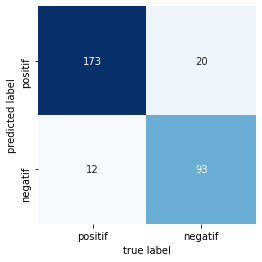

In [23]:
import matplotlib.pyplot as plt

sns.heatmap(confusion, square=True, annot=True, cbar=False, cmap='Blues', fmt='.3g',
xticklabels=['positif', 'negatif'], yticklabels=['positif', 'negatif'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [24]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
model2 = metrics.accuracy_score(BNB.predict(X_test),Y_test)
print('Akurasi BNB Tanpa Stemming dan Stopwords dengan 20% data test = ' + str('{:4.2f}'.format(model2*100))+'%')

Akurasi BNB Tanpa Stemming dan Stopwords dengan 20% data test = 81.54%


In [25]:
output = pd.DataFrame({'tweet': X_test, 'label': predicted})
output['label'].value_counts()

1    185
2    113
Name: label, dtype: int64

In [26]:
confusion = confusion_matrix(Y_test, BNB.predict(X_test))
print(confusion)

[[178  15]
 [ 40  65]]


Text(91.68, 0.5, 'predicted label')

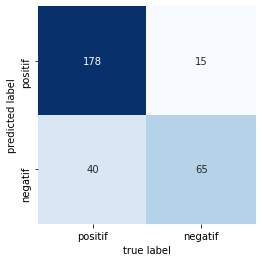

In [27]:
sns.heatmap(confusion, square=True, annot=True, cbar=False, cmap='Blues', fmt='.3g',
xticklabels=['positif', 'negatif'], yticklabels=['positif', 'negatif'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df1['Kategori'], test_size=0.1)
print(X_train.shape, X_test.shape)

(1339, 3234) (149, 3234)


In [29]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

predicted = MNB.predict(X_test)
model1_1 = metrics.accuracy_score(predicted, Y_test)
print('Akurasi MNB Tanpa Stemming dan Stopwords dengan 10% data test = ' + str('{:04.2f}'.format(model1_1*100))+'%')

Akurasi MNB Tanpa Stemming dan Stopwords dengan 10% data test = 93.96%


In [30]:
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
model2_1 = metrics.accuracy_score(BNB.predict(X_test),Y_test)
print('Akurasi BNB Tanpa Stemming dan Stopwords dengan 10% data test = ' + str('{:4.2f}'.format(model2_1*100))+'%')

Akurasi BNB Tanpa Stemming dan Stopwords dengan 10% data test = 90.60%


# 5. STOPWORDS

In [31]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  

def remove_stop_words(text):
    text = text.split()
    listStopword =  set(stopwords.words('indonesian'))
    text = [w for w in text if not w in listStopword]
    text = " ".join(text)
    return text

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df1['cleaned_tweets'] = df1['cleaned_tweets'].apply(lambda x: remove_stop_words(x))
df1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet,Kategori,cleaned_tweets
0,@MaspiyuO Tampang si Jokowi dan Si Koruptor E-...,2,tampang si jokowi si koruptor e ktp puan mahar...
1,Ribet gini si corona teh. Di Bisnis teruss. Eh...,2,ruwet si corona teh bisnis eh sih bisnis makan...
2,@fadlizon Akal sehat pun harus dipakai. Sumber...,2,akal sehat dipakai sumber virus corona merokok...
3,@fadlizon Sumber dan Asal birus corona covid 1...,2,sumber virus corona merokok cina jual vaksin o...
4,Negara yang lalai menjaga rakyat dari terpapar...,2,negara lalai menjaga rakyat terpapar virus cor...
...,...,...,...
1995,"Tak usah ragu dan takut dengan Vaksin, BPOM p...",1,ragu takut vaksin bpom pastikan vaksin corona ...
1996,"Untuk mengendalikan pandemi, vaksin Corona per...",1,mengendalikan pandemi vaksin corona populasi d...
1997,@jokowi Sehingga vaksin ini mampu menjadi hara...,1,vaksin harapan indonesia bebas corona vaksin d...
1998,@27_jelo @jokowi #DemiNKRI Akooh jg siap utk ...,1,vaksin vaksin corona aman


In [33]:
text_counts = cv.fit_transform(df1['cleaned_tweets'])

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df1['Kategori'], test_size=0.2)
print(X_train.shape, X_test.shape)

(1190, 2813) (298, 2813)


In [35]:
MNB.fit(X_train, Y_train)
predicted = MNB.predict(X_test)
model33 = metrics.accuracy_score(predicted, Y_test)
print('Akurasi MNB Tanpa Stemming dengan 20% data test = ' + str('{:04.2f}'.format(model33*100))+'%')

Akurasi MNB Tanpa Stemming dengan 20% data test = 87.25%


In [36]:
BNB.fit(X_train, Y_train)
model44 = metrics.accuracy_score(BNB.predict(X_test),Y_test)
print('Akurasi BNB Tanpa Stemming dengan 20% data test = ' + str('{:4.2f}'.format(model44*100))+'%')

Akurasi BNB Tanpa Stemming dengan 20% data test = 80.87%


In [37]:
def noise(text): 
    text = text.split()
    listStopword =  ['amp','fry', 'vcs', 'bahh', 'a', 'wkwkwk', 'c', 'iya', 'nya', 
                     'sih', 'mbok', 'ku', 'loh', 'lho', 'ah', 'nihh', 'ya', 'hah', 
                     'deh','rmp', 'v', 'via', 'lha', 'mah', 'xixi', 'nya', 'ku',
                     'kah', 'nge', 'an', 'pun', 'si', 'dong', 'deh', 'toh','cc', 
                     'nah','re','mah','ee', 'in','oi', 'woyyy','kan', 'nah','s','dodo']
    text = [w for w in text if not w in listStopword]
    text = " ".join(text)
    return text

In [38]:
df1['cleaned_tweets'] = df1['cleaned_tweets'].apply(lambda x: noise(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
text_counts = cv.fit_transform(df1['cleaned_tweets'])

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df1['Kategori'], test_size=0.2)
print(X_train.shape, X_test.shape)

(1190, 2785) (298, 2785)


In [41]:
Y_test.value_counts()

1    202
2     96
Name: Kategori, dtype: int64

In [42]:
Y_train.value_counts()

1    834
2    356
Name: Kategori, dtype: int64

In [43]:
MNB.fit(X_train, Y_train)
predicted = MNB.predict(X_test)
model3 = metrics.accuracy_score(predicted, Y_test)
print('Akurasi MNB Tanpa Stemming dengan 20% data test =' + str('{:04.2f}'.format(model3*100))+'%')

Akurasi MNB Tanpa Stemming dengan 20% data test =88.93%


In [44]:
output = pd.DataFrame({'tweet': X_test, 'label': predicted})
output['label'].value_counts()

1    203
2     95
Name: label, dtype: int64

In [45]:
confusion = confusion_matrix(Y_test, MNB.predict(X_test))
print(confusion)

[[186  16]
 [ 17  79]]


Text(91.68, 0.5, 'predicted label')

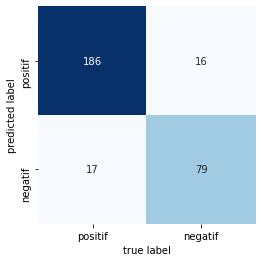

In [46]:
sns.heatmap(confusion, square=True, annot=True, cbar=False, cmap='Blues', fmt='.3g',
xticklabels=['positif', 'negatif'], yticklabels=['positif', 'negatif'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [47]:
BNB.fit(X_train, Y_train)
model4 = metrics.accuracy_score(BNB.predict(X_test),Y_test)
print('Akurasi BNB Tanpa Stemming dengan 20% data test = ' + str('{:4.2f}'.format(model4*100))+'%')

Akurasi BNB Tanpa Stemming dengan 20% data test = 83.56%


In [48]:
output = pd.DataFrame({'tweet': X_test, 'label': predicted})
output['label'].value_counts()

1    203
2     95
Name: label, dtype: int64

In [49]:
confusion = confusion_matrix(Y_test, BNB.predict(X_test))
print(confusion)

[[188  14]
 [ 35  61]]


Text(91.68, 0.5, 'predicted label')

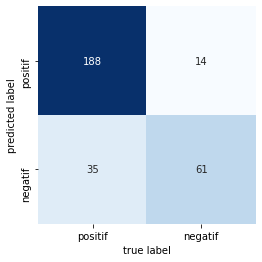

In [50]:
sns.heatmap(confusion, square=True, annot=True, cbar=False, cmap='Blues', fmt='.3g',
xticklabels=['positif', 'negatif'], yticklabels=['positif', 'negatif'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [51]:
labels = ['Stopwords', 'ListStopwords dan Stopwords']
multinomial = [model33, model3]
bernoulli = [model44, model4]
d={'Prepocessing':labels, 'Multinomial':multinomial, 'Bernoulli':bernoulli}   
dataframe=pd.DataFrame(d)
dataframe

,Prepocessing,Multinomial,Bernoulli
0,Stopwords,0.872483,0.808725
1,ListStopwords dan Stopwords,0.889262,0.835570


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df1['Kategori'], test_size=0.1)
print(X_train.shape, X_test.shape)

(1339, 2785) (149, 2785)


In [53]:
MNB.fit(X_train, Y_train)
predicted = MNB.predict(X_test)
model3_1 = metrics.accuracy_score(predicted, Y_test)
print('Akurasi MNB Tanpa Stemming dengan 10% data test' + str('{:04.2f}'.format(model3_1*100))+'%')

Akurasi MNB Tanpa Stemming dengan 10% data test93.29%


In [54]:
BNB.fit(X_train, Y_train)
model4_1 = metrics.accuracy_score(BNB.predict(X_test),Y_test)
print('Akurasi BNB Tanpa Stemming dengan 10% data test = ' + str('{:4.2f}'.format(model4_1*100))+'%')

Akurasi BNB Tanpa Stemming dengan 10% data test = 91.95%


# 6. STEMMING

In [55]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer    

def steamming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    split = text.split()
    hasil = [stemmer.stem(token) for token in split]
    hasil = " ".join(hasil)
    return hasil

In [56]:
df1['cleaned_tweets'] = df1['cleaned_tweets'].apply(lambda x: steamming(x))
df1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet,Kategori,cleaned_tweets
0,@MaspiyuO Tampang si Jokowi dan Si Koruptor E-...,2,tampang jokowi koruptor e ktp puan maharani da...
1,Ribet gini si corona teh. Di Bisnis teruss. Eh...,2,ruwet corona teh bisnis eh bisnis makan jerink...
2,@fadlizon Akal sehat pun harus dipakai. Sumber...,2,akal sehat pakai sumber virus corona rokok asa...
3,@fadlizon Sumber dan Asal birus corona covid 1...,2,sumber virus corona rokok cina jual vaksin oba...
4,Negara yang lalai menjaga rakyat dari terpapar...,2,negara lalai jaga rakyat papar virus corona ne...
...,...,...,...
1995,"Tak usah ragu dan takut dengan Vaksin, BPOM p...",1,ragu takut vaksin bpom pasti vaksin corona aman
1996,"Untuk mengendalikan pandemi, vaksin Corona per...",1,kendali pandemi vaksin corona populasi dunia b...
1997,@jokowi Sehingga vaksin ini mampu menjadi hara...,1,vaksin harap indonesia bebas corona vaksin har...
1998,@27_jelo @jokowi #DemiNKRI Akooh jg siap utk ...,1,vaksin vaksin corona aman


In [57]:
df1.to_csv('prepocessing.csv',index=False)

# VEKTORISASI

In [58]:
text_counts = cv.fit_transform(df1['cleaned_tweets'])

# SPLIT DATASET

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df1['Kategori'], test_size=0.2)
print(X_train.shape, X_test.shape)

(1190, 2037) (298, 2037)


In [60]:
Y_test.value_counts()

1    207
2     91
Name: Kategori, dtype: int64

In [61]:
Y_train.value_counts()

1    829
2    361
Name: Kategori, dtype: int64

# KLASIFIKASI

# 1. Naive Bayes MNB

In [62]:
MNB.fit(X_train, Y_train)
predicted = MNB.predict(X_test)
model5 = metrics.accuracy_score(predicted, Y_test)
print('Akurasi MNB Dengan Stemming dan Stopwords dengan 20% data test ' + str('{:04.2f}'.format(model5*100))+'%')

Akurasi MNB Dengan Stemming dan Stopwords dengan 20% data test 90.27%


In [63]:
from sklearn.metrics import confusion_matrix
import numpy as np

confusion = confusion_matrix(Y_test, predicted)
print(confusion)

[[196  11]
 [ 18  73]]


Text(91.68, 0.5, 'predicted label')

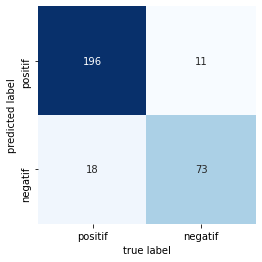

In [64]:
sns.heatmap(confusion, square=True, annot=True, cbar=False, cmap='Blues', fmt='.3g',
xticklabels=['positif', 'negatif'], yticklabels=['positif', 'negatif'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [65]:
output = pd.DataFrame({'tweet': X_test, 'label': predicted})
output['label'].value_counts()

1    214
2     84
Name: label, dtype: int64

# 2. Naive Bayes BNB

In [66]:
BNB.fit(X_train, Y_train)
model6 = metrics.accuracy_score(BNB.predict(X_test),Y_test)
print('Akurasi BNB Dengan Stemming dan Stopwords dengan 20% data test = ' + str('{:4.2f}'.format(model6*100))+'%')

Akurasi BNB Dengan Stemming dan Stopwords dengan 20% data test = 83.56%


In [67]:
predicted = BNB.predict(X_test)
confusion = confusion_matrix(Y_test, predicted)
print(confusion)

[[196  11]
 [ 38  53]]


Text(91.68, 0.5, 'predicted label')

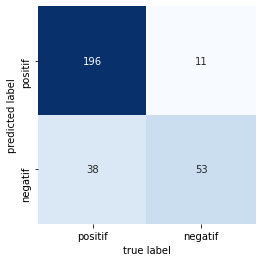

In [68]:
sns.heatmap(confusion, square=True, annot=True, cbar=False, cmap='Blues', fmt='.3g',
xticklabels=['positif', 'negatif'], yticklabels=['positif', 'negatif'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [69]:
output = pd.DataFrame({'tweet': X_test, 'label': predicted})
output['label'].value_counts()

1    234
2     64
Name: label, dtype: int64

10% DATA TEST dan 90% DATA TRAIN

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df1['Kategori'], test_size=0.1)
print(X_train.shape, X_test.shape)

(1339, 2037) (149, 2037)


In [71]:
MNB.fit(X_train, Y_train)
predicted = MNB.predict(X_test)
model5_1  = metrics.accuracy_score(predicted, Y_test)
print('Akurasi MNB Dengan Stemming dan Stopwords dengan 20% data test ' + str('{:04.2f}'.format(model5_1*100))+'%')

Akurasi MNB Dengan Stemming dan Stopwords dengan 20% data test 91.28%


In [72]:
BNB.fit(X_train, Y_train)
model6_1 = metrics.accuracy_score(BNB.predict(X_test),Y_test)
print('Akurasi BNB Dengan Stemming dan Stopwords dengan 20% data test = ' + str('{:4.2f}'.format(model6_1*100))+'%')

Akurasi BNB Dengan Stemming dan Stopwords dengan 20% data test = 83.22%


In [73]:
labels = ['Tanpa Stemming dan Stopwords', 'Tanpa Stemming', 'Stemming dan Stopwords']
multinomial = [model1, model3, model5]
bernoulli = [model2, model4, model6]
d={'Prepocessing':labels, 'Multinomial':multinomial, 'Bernoulli':bernoulli}   
dataframe=pd.DataFrame(d)
dataframe

,Prepocessing,Multinomial,Bernoulli
0,Tanpa Stemming dan Stopwords,0.892617,0.815436
1,Tanpa Stemming,0.889262,0.835570
2,Stemming dan Stopwords,0.902685,0.835570


In [74]:
labels = ['Tanpa Stemming dan Stopwords', 'Tanpa Stemming', 'Stemming dan Stopwords']
multinomial = [model1_1, model3_1, model5_1]
bernoulli = [model2_1, model4_1, model6_1]
d={'Prepocessing':labels, 'Multinomial':multinomial, 'Bernoulli':bernoulli}   
dataframe=pd.DataFrame(d)
dataframe

,Prepocessing,Multinomial,Bernoulli
0,Tanpa Stemming dan Stopwords,0.939597,0.906040
1,Tanpa Stemming,0.932886,0.919463
2,Stemming dan Stopwords,0.912752,0.832215


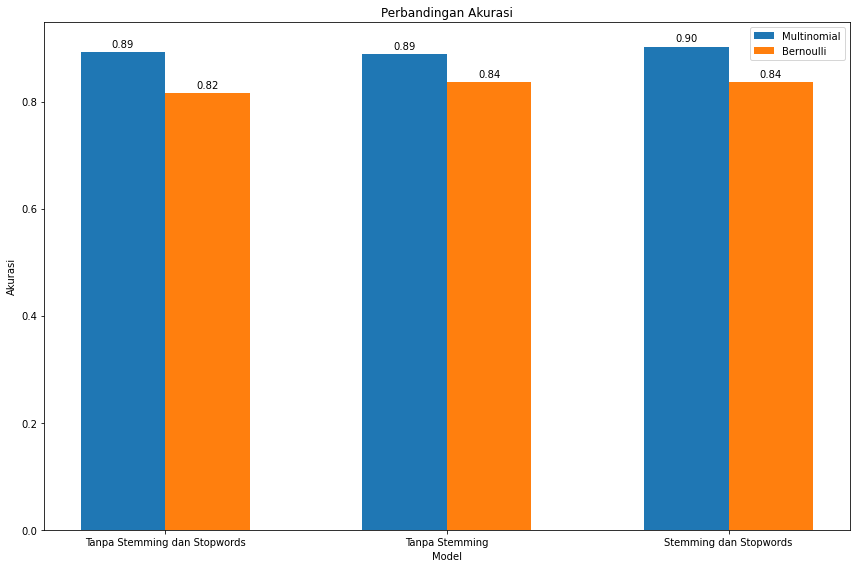

In [75]:
import numpy as np


labels = ['Tanpa Stemming dan Stopwords', 'Tanpa Stemming', 'Stemming dan Stopwords']
MNB = [model1, model3, model5]
BNB = [model2, model4, model6]

x = np.arange(len(labels))
width = 0.3
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, MNB, width, label='Multinomial')
rects2 = ax.bar(x + width/2, BNB, width, label='Bernoulli')

ax.set_ylabel('Akurasi')
ax.set_xlabel('Model')
ax.set_title('Perbandingan Akurasi')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:4.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects2)
autolabel(rects1)

fig.tight_layout()


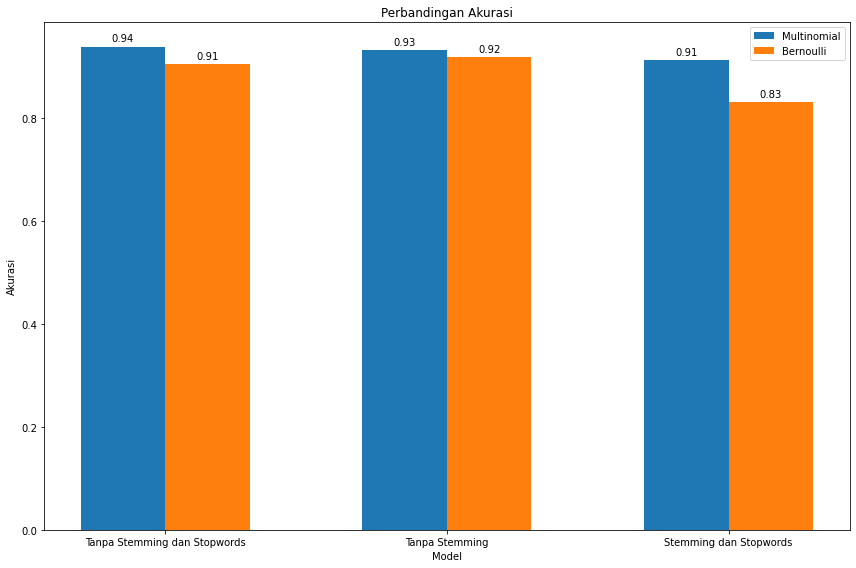

In [76]:
labels = ['Tanpa Stemming dan Stopwords', 'Tanpa Stemming', 'Stemming dan Stopwords']
MNB = [model1_1, model3_1, model5_1]
BNB = [model2_1, model4_1, model6_1]

x = np.arange(len(labels))
width = 0.3
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, MNB, width, label='Multinomial')
rects2 = ax.bar(x + width/2, BNB, width, label='Bernoulli')

ax.set_ylabel('Akurasi')
ax.set_xlabel('Model')
ax.set_title('Perbandingan Akurasi')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:4.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects2)
autolabel(rects1)

fig.tight_layout()


# SAVE MODEL

In [77]:
import joblib

filename = 'vektor.sav'
joblib.dump(cv, filename)

['vektor.sav']

In [78]:
filename = 'MNB.sav'
joblib.dump(MNB, filename)

['MNB.sav']

In [79]:
filename = 'BNB.sav'
joblib.dump(BNB, filename)

['BNB.sav']